In [6]:
print(5)


5


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of users
num_users = 1000

# Initialize the DataFrame
df = pd.DataFrame({
    'Uid': range(1, num_users + 1),
    'Verification status': np.random.choice([True, False], size=num_users, p=[0.85, 0.15]),
    'Following rate': np.random.uniform(-10, 10, num_users),
    'Unfollowing rate': np.random.uniform(-10, 0, num_users),
    'Reel engagement': np.random.uniform(-10, 10, num_users),
    'Total value': 0
})

# Calculate the Total value
df['Total value'] = df['Following rate'] + df['Unfollowing rate'] + df['Reel engagement']

# Ensure at least 10 users have a Total value of 0
zero_value_indices = np.random.choice(df.index, 10, replace=False)
df.loc[zero_value_indices, ['Following rate', 'Unfollowing rate', 'Reel engagement']] = 0
df.loc[zero_value_indices, 'Total value'] = 0

# Adjust Total value to ensure around 6% of users have a Total value below 0
below_zero_count = int(0.06 * num_users)
remaining_below_zero_count = below_zero_count - len(df[df['Total value'] < 0])

if remaining_below_zero_count > 0:
    below_zero_indices = np.random.choice(df[df['Total value'] >= 0].index, remaining_below_zero_count, replace=False)
    df.loc[below_zero_indices, 'Total value'] = df.loc[below_zero_indices, 'Total value'] - np.random.uniform(0.1, 10, remaining_below_zero_count)

# Plot the Data
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Verification status
axs[0, 0].bar(df['Verification status'].value_counts().index.astype(str), df['Verification status'].value_counts().values)
axs[0, 0].set_title('Verification Status')
axs[0, 0].set_xlabel('Status')
axs[0, 0].set_ylabel('Count')

# Histogram for Total value
axs[0, 1].hist(df['Total value'], bins=30, edgecolor='k')
axs[0, 1].set_title('Total Value Distribution')
axs[0, 1].set_xlabel('Total Value')
axs[0, 1].set_ylabel('Frequency')

# Scatter plot for Following rate vs Unfollowing rate
axs[1, 0].scatter(df['Following rate'], df['Unfollowing rate'], alpha=0.5)
axs[1, 0].set_title('Following Rate vs Unfollowing Rate')
axs[1, 0].set_xlabel('Following Rate')
axs[1, 0].set_ylabel('Unfollowing Rate')

# Scatter plot for Total value vs Reel engagement
axs[1, 1].scatter(df['Reel engagement'], df['Total value'], alpha=0.5)
axs[1, 1].set_title('Reel Engagement vs Total Value')
axs[1, 1].set_xlabel('Reel Engagement')
axs[1, 1].set_ylabel('Total Value')

plt.tight_layout()
plt.show()


ValueError: a must be greater than 0 unless no samples are taken

In [86]:
display(df.head(100))

,Uid,Verification status,Following rate,Unfollowing rate,Reel engagement,Total value
0,1,True,2.454366,-2.036194,1.412994,1.831166
1,2,True,-1.435310,-3.171218,-9.837703,-14.444231
2,3,True,-4.633016,-0.861466,8.404300,2.909818
3,4,True,-4.403258,-4.106474,-9.477729,-17.987461
4,5,True,4.389041,-5.847898,-1.098031,-2.556887
...,...,...,...,...,...,...
95,96,True,2.060834,-3.022471,2.829204,1.867567
96,97,True,-6.896210,-0.440703,1.986936,-5.349977
97,98,False,6.298147,-2.670520,2.065296,5.692924
98,99,True,0.097581,-8.387958,-1.719980,-10.010357


In [89]:
df_sorted = df.sort_values(by='Total value')

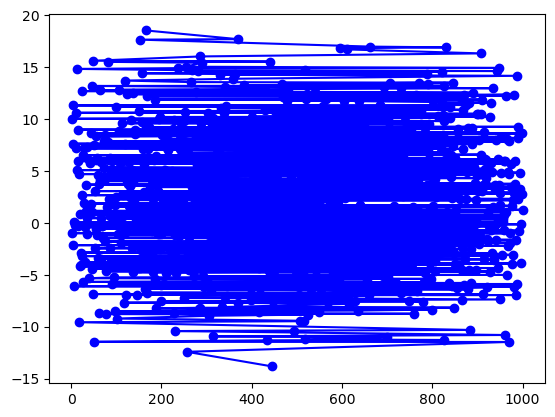

In [79]:
plt.plot(df_sorted['Uid'], df_sorted['Total value'], marker='o', linestyle='-', color='b')

In [91]:
df_sorted = df.sort_values(by='Total value', ascending=False)

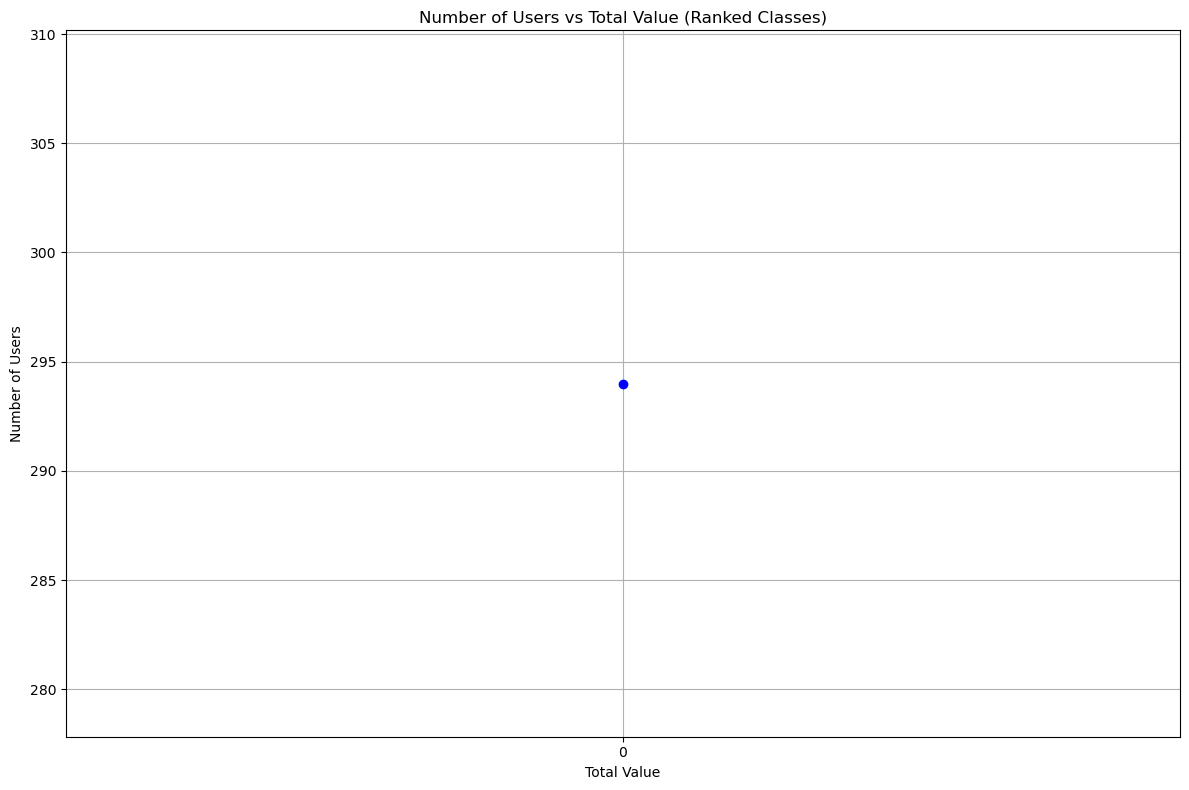

In [93]:
# Sort the DataFrame by Total value in increasing order
df_sorted = df.sort_values(by='Total value')

# Define bins and count users in each bin
bin_size = 50  # Decreased bin size to get more bins
bins = np.arange(0, df_sorted['Total value'].max() + bin_size, bin_size)
labels = bins[:-1]
df_sorted['Bin'] = pd.cut(df_sorted['Total value'], bins=bins, labels=labels, include_lowest=True)
bin_counts = df_sorted.groupby('Bin').size()

# Plot the Curve Graph
plt.figure(figsize=(12, 8))
plt.plot(bin_counts.index.astype(int) * bin_size, bin_counts.values, marker='o', linestyle='-', color='b')
plt.title('Number of Users vs Total Value (Ranked Classes)')
plt.xlabel('Total Value')
plt.ylabel('Number of Users')
plt.grid(True)
plt.xticks(np.arange(0, df_sorted['Total value'].max() + bin_size, bin_size * 2))  # Adjusting x-axis ticks for clarity
plt.tight_layout()
plt.show()

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of users
num_users = 1000

# Function to generate exponentially distributed values
def exponential_distribution(size):
    # Generate values from exponential distribution
    values = np.random.exponential(scale=1, size=size)  # Adjust scale as needed
    return values

# Generate exponentially distributed values
following_rate = exponential_distribution(num_users)
reel_engagement = exponential_distribution(num_users)

# Adjust the range and probability for unfollowing rate
unfollowing_rate = np.random.uniform(-10, 10, num_users)
# Set values below 0 for approximately 10% of users
below_zero_indices = np.random.choice(num_users, size=int(num_users * 0.10), replace=False)
unfollowing_rate[below_zero_indices] = np.random.uniform(-10, 0, size=int(num_users * 0.10))

# Generate DataFrame
df = pd.DataFrame({
    'Uid': range(1, num_users + 1),
    'Verification status': np.random.choice([True, False], size=num_users, p=[0.85, 0.15]),
    'Following rate': following_rate,
    'Unfollowing rate': unfollowing_rate,
    'Reel engagement': np.random.uniform(-10, 10, num_users),
    'Total value': 0
})

# Calculate Total value
df['Total value'] = df['Following rate'] + df['Unfollowing rate'] + df['Reel engagement']

# Ensure at least 10 users have a Total value of 0
zero_value_indices = np.random.choice(df.index, 10, replace=False)
df.loc[zero_value_indices, ['Following rate', 'Unfollowing rate', 'Reel engagement']] = 0
df.loc[zero_value_indices, 'Total value'] = 0

# Adjust Total value to ensure around 6% of users have Total value below 0
below_zero_count = int(0.06 * num_users)
remaining_below_zero_count = below_zero_count - len(df[df['Total value'] < 0])

if remaining_below_zero_count > 0:
    below_zero_indices = np.random.choice(df[df['Total value'] >= 0].index, remaining_below_zero_count, replace=False)
    df.loc[below_zero_indices, 'Total value'] = df.loc[below_zero_indices, 'Total value'] - np.random.uniform(0.1, 10, remaining_below_zero_count)

# Display the DataFrame
print(df.head(100))

df_sorted = df.sort_values(by='Total value')

# Define bins and count users in each bin
bin_size = 50  # Decreased bin size to get more bins
bins = np.arange(0, df_sorted['Total value'].max() + bin_size, bin_size)
labels = bins[:-1]
df_sorted['Bin'] = pd.cut(df_sorted['Total value'], bins=bins, labels=labels, include_lowest=True)
bin_counts = df_sorted.groupby('Bin').size()

# Plot the Curve Graph
plt.figure(figsize=(12, 8))
plt.plot(bin_counts.index.astype(int) * bin_size, bin_counts.values, marker='o', linestyle='-', color='b')
plt.title('Number of Users vs Total Value (Ranked Classes)')
plt.xlabel('Total Value')
plt.ylabel('Number of Users')
plt.grid(True)
plt.xticks(np.arange(0, df_sorted['Total value'].max() + bin_size, bin_size * 2))  # Adjusting x-axis ticks for clarity
plt.tight_layout()
plt.show()

    Uid  Verification status  Following rate  Unfollowing rate  \
0     1                 True        0.050202          6.748359   
1     2                False        1.675384          8.587803   
2     3                 True        0.001091         -2.473551   
3     4                 True        2.818991         -2.601714   
4     5                 True        0.308446          5.491321   
..  ...                  ...             ...               ...   
95   96                 True        0.255422         -1.461058   
96   97                 True        0.840023          2.489296   
97   98                 True        0.996503         -2.378507   
98   99                 True        0.675416          4.848053   
99  100                 True        0.527350         -5.542726   

    Reel engagement  Total value  
0          6.496540    13.295101  
1         -9.576870     0.686317  
2          0.365978    -2.106483  
3         -2.007342    -1.790064  
4          8.134252    13.934019

TypeError: unsupported operand type(s) for *: 'Categorical' and 'int'

<Figure size 1200x800 with 0 Axes>

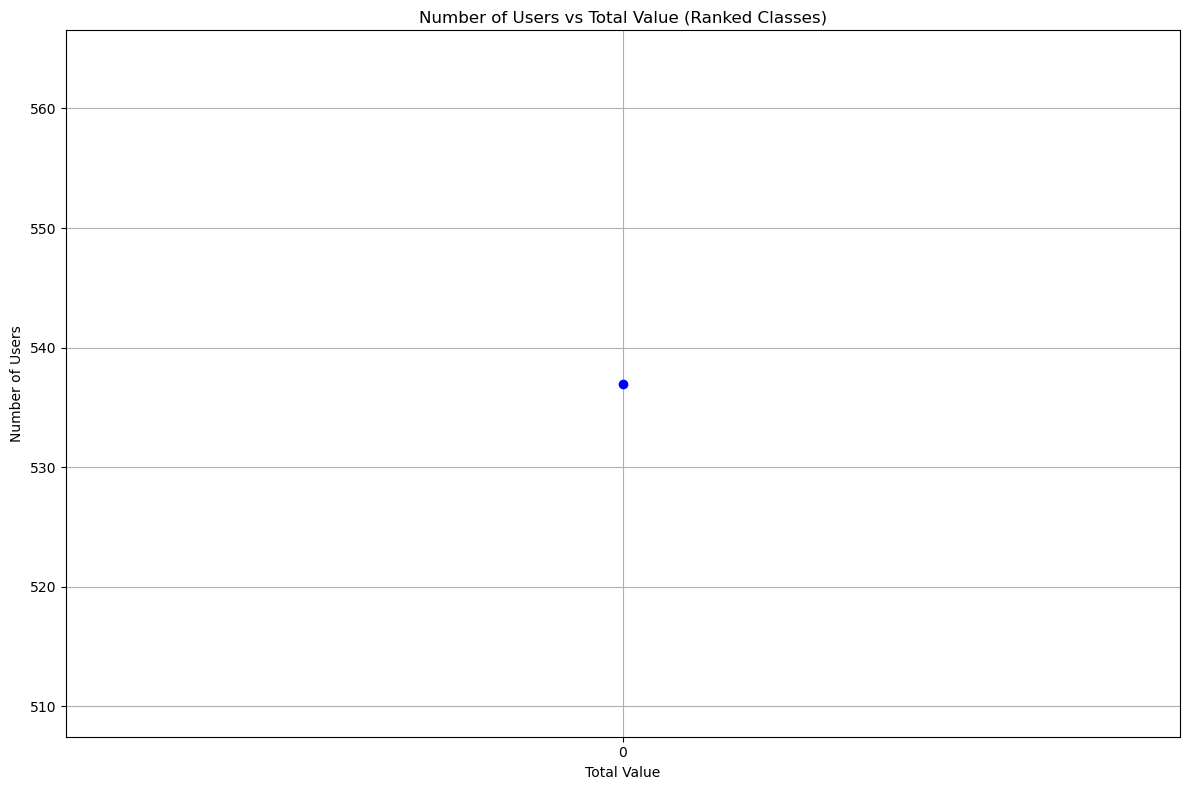

In [107]:
# Sort the DataFrame by Total value in increasing order
df_sorted = df.sort_values(by='Total value')

# Define bins and count users in each bin
bin_size = 50  # Decreased bin size to get more bins
bins = np.arange(0, df_sorted['Total value'].max() + bin_size, bin_size)
labels = bins[:-1]
df_sorted['Bin'] = pd.cut(df_sorted['Total value'], bins=bins, labels=labels, include_lowest=True)
bin_counts = df_sorted.groupby('Bin').size()

# Plot the Curve Graph
plt.figure(figsize=(12, 8))
plt.plot(bin_counts.index.astype(int) * bin_size, bin_counts.values, marker='o', linestyle='-', color='b')
plt.title('Number of Users vs Total Value (Ranked Classes)')
plt.xlabel('Total Value')
plt.ylabel('Number of Users')
plt.grid(True)
plt.xticks(np.arange(0, df_sorted['Total value'].max() + bin_size, bin_size * 2))  # Adjusting x-axis ticks for clarity
plt.tight_layout()
plt.show()

    Uid  Username  Verification status  Net Engagement  Account Reached  \
0     1    user_1                 True        1.006032         6.619164   
1     2    user_2                 True        1.402699         7.120390   
2     3    user_3                 True        9.670615         5.417508   
3     4    user_4                 True        2.195711         5.515379   
4     5    user_5                 True        7.517335         5.505164   
..  ...       ...                  ...             ...              ...   
95   96   user_96                 True        0.487723         5.190977   
96   97   user_97                False       -5.330715         0.008141   
97   98   user_98                 True        5.550659         6.927871   
98   99   user_99                 True        7.359552         5.138861   
99  100  user_100                 True        6.609180         5.329521   

      Report  Net Profile Credit  
0   0.000000            7.625196  
1   0.000000            8.523

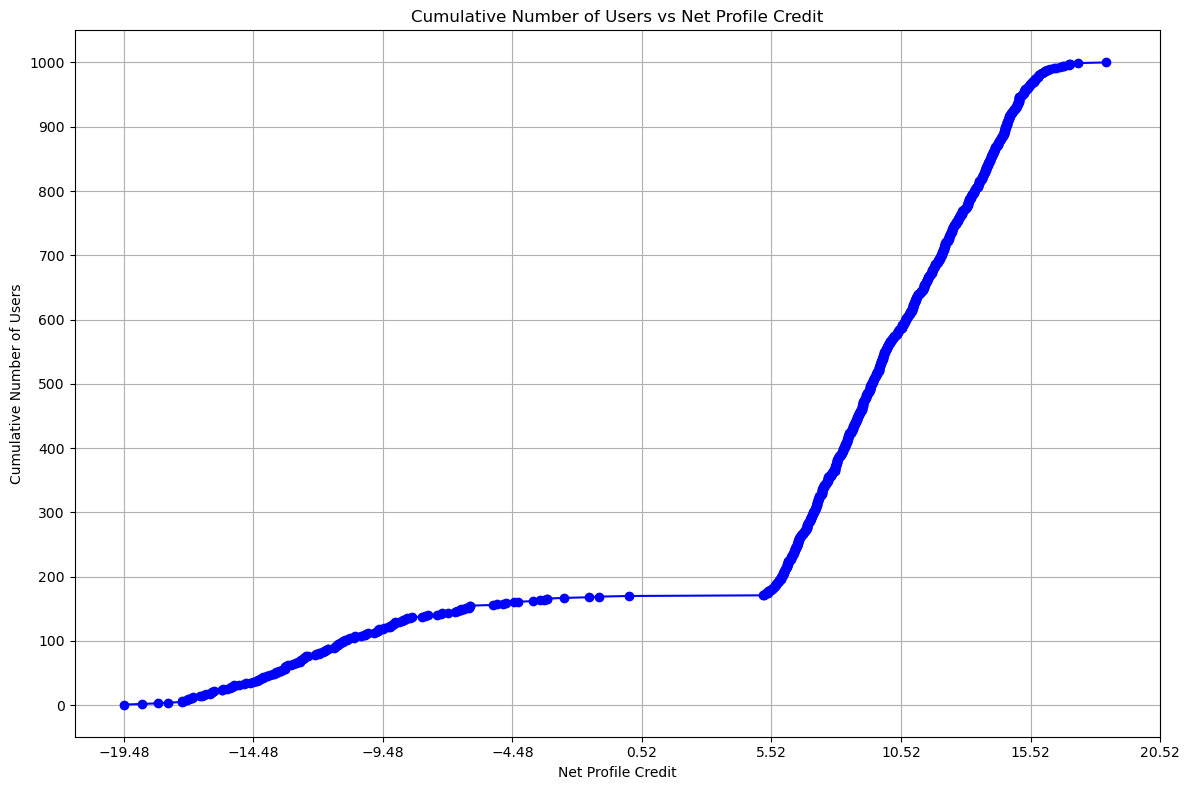

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of users
num_users = 1000

# Function to generate unique usernames
def generate_usernames(size):
    return [f'user_{i}' for i in range(1, size + 1)]

# Function to generate exponentially distributed values within range
def exponential_distribution_within_range(size, low, high):
    values = np.random.exponential(scale=1, size=size)
    values = low + (high - low) * (values / np.max(values))  # Scale to fit within [low, high]
    return np.clip(values, low, high)

# Generate the initial DataFrame
df = pd.DataFrame({
    'Uid': range(1, num_users + 1),
    'Username': generate_usernames(num_users),
    'Verification status': np.random.choice([True, False], size=num_users, p=[0.85, 0.15]),
    'Net Engagement': exponential_distribution_within_range(num_users, -10, 10),
    'Account Reached': exponential_distribution_within_range(num_users, 0, 10),
    'Report': np.zeros(num_users),
    'Net Profile Credit': 0
})

# Set conditions based on verification status
verified_indices = df[df['Verification status'] == True].index
unverified_indices = df[df['Verification status'] == False].index

# Adjust Net Engagement for verified accounts to have no negative values
df.loc[verified_indices, 'Net Engagement'] = np.random.uniform(0, 10, size=len(verified_indices))

# Adjust Report for unverified accounts to have random values between -10 and 0
df.loc[unverified_indices, 'Report'] = np.random.uniform(-10, 0, size=len(unverified_indices))

# Adjust Account Reached to ensure unverified accounts have the least values
df.loc[unverified_indices, 'Account Reached'] = exponential_distribution_within_range(len(unverified_indices), 0, 5)
df.loc[verified_indices, 'Account Reached'] = exponential_distribution_within_range(len(verified_indices), 5, 10)

# Calculate Net Profile Credit
df['Net Profile Credit'] = df['Net Engagement'] + df['Account Reached'] + df['Report']

# Display the DataFrame
print(df.head(100))

# Sort DataFrame by Net Profile Credit
df_sorted = df.sort_values(by='Net Profile Credit')

# Compute cumulative count
total_value_counts = df_sorted['Net Profile Credit'].value_counts().sort_index()
cumulative_counts = total_value_counts.cumsum()

# Plot the Line Graph
plt.figure(figsize=(12, 8))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Number of Users vs Net Profile Credit')
plt.xlabel('Net Profile Credit')
plt.ylabel('Cumulative Number of Users')
plt.grid(True)
plt.xticks(np.arange(df_sorted['Net Profile Credit'].min(), df_sorted['Net Profile Credit'].max() + 5, 5))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.tight_layout()
plt.show()


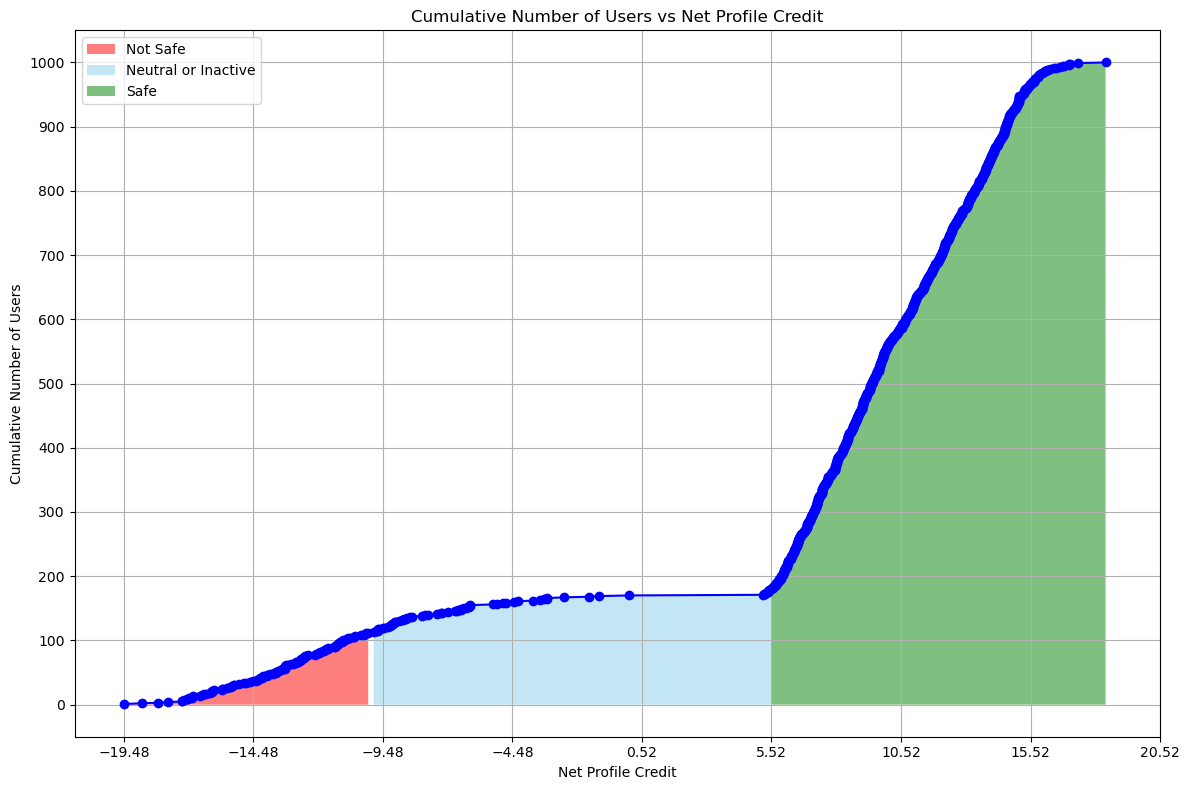

In [130]:
# Plot the Line Graph with labelled areas
plt.figure(figsize=(12, 8))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-', color='b')

# Fill areas
plt.fill_between(cumulative_counts.index, 0, cumulative_counts.values, where=(cumulative_counts.index < -10), 
                 facecolor='red', alpha=0.5, label='Not Safe')
plt.fill_between(cumulative_counts.index, 0, cumulative_counts.values, where=(cumulative_counts.index >= -10) & (cumulative_counts.index <= 5.52), 
                 facecolor='skyblue', alpha=0.5, label='Neutral or Inactive')
plt.fill_between(cumulative_counts.index, 0, cumulative_counts.values, where=(cumulative_counts.index > 5.52), 
                 facecolor='green', alpha=0.5, label='Safe')

# Labels and title for graphs
plt.title('Cumulative Number of Users vs Net Profile Credit')
plt.xlabel('Net Profile Credit')
plt.ylabel('Cumulative Number of Users')
plt.legend(loc='upper left')

# Grid and ticks

plt.grid(True)
plt.xticks(np.arange(df_sorted['Net Profile Credit'].min(), df_sorted['Net Profile Credit'].max() + 5, 5))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.tight_layout()
# Show plot
plt.show()

In [150]:
# Get the usernames of accounts with Net Profile Credit < -10
unsafe_accounts = df[df['Net Profile Credit'] < -10]['Username']

# Print the usernames
print("Usernames of accounts with Net Profile Credit < -10:")
print(unsafe_accounts.tolist())

Usernames of accounts with Net Profile Credit < -200:
['user_10', 'user_14', 'user_23', 'user_26', 'user_36', 'user_45', 'user_54', 'user_62', 'user_67', 'user_73', 'user_97', 'user_109', 'user_111', 'user_114', 'user_128', 'user_140', 'user_156', 'user_166', 'user_182', 'user_193', 'user_194', 'user_202', 'user_238', 'user_243', 'user_265', 'user_267', 'user_280', 'user_282', 'user_302', 'user_313', 'user_315', 'user_329', 'user_337', 'user_349', 'user_380', 'user_383', 'user_396', 'user_399', 'user_401', 'user_407', 'user_408', 'user_418', 'user_427', 'user_430', 'user_441', 'user_443', 'user_465', 'user_473', 'user_480', 'user_483', 'user_484', 'user_485', 'user_492', 'user_496', 'user_498', 'user_507', 'user_524', 'user_547', 'user_551', 'user_553', 'user_556', 'user_558', 'user_559', 'user_561', 'user_567', 'user_572', 'user_574', 'user_579', 'user_580', 'user_589', 'user_608', 'user_612', 'user_632', 'user_642', 'user_650', 'user_653', 'user_683', 'user_685', 'user_686', 'user_68